In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [104]:
# Lendo o arquivo CSV
df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

In [105]:
# Código que cria uma coluna que define qual time venceu a partida
df["Vencedor"] = df.apply(lambda x: x["Time 1"] if x["Gols 1"] > x["Gols 2"] else x["Time 2"] if x["Gols 1"] < x["Gols 2"] else "Empate", axis=1)

In [106]:
# Mostrando o nosso dataframe/tabela
df

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2,Vencedor
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3,Glasgow Rangers
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2,Empate
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2,Empate
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1,Hearts
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1,Aberdeen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,NaN,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1,Blackburn
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,NaN,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2,Arsenal
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,NaN,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2,Manchester Utd
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,...,NaN,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2,Empate


In [107]:
#Definindo o estilo para combinar com o fundo branco que é o padrão
sns.set_style("white")

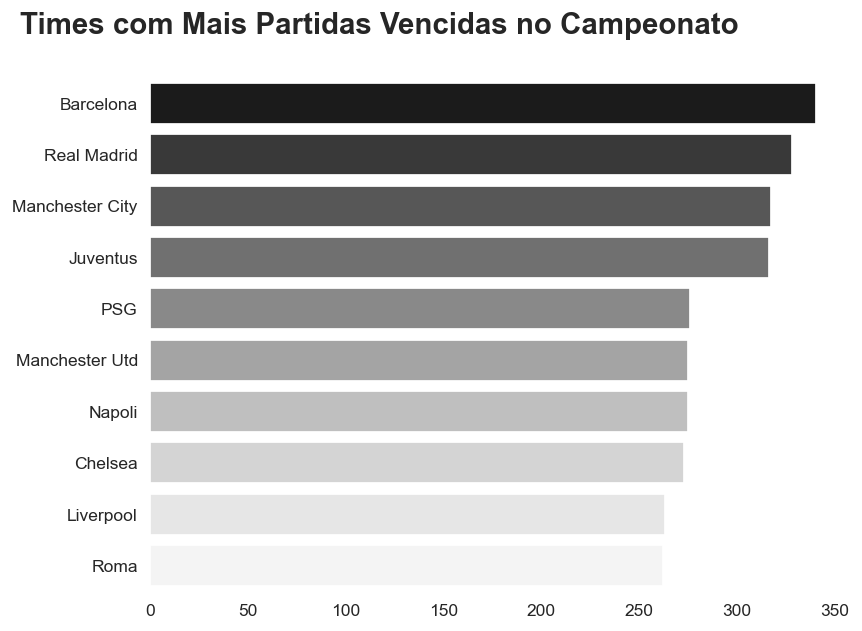

In [108]:
# Exemplo de oque podemos fazer, criando uma tabela auxiliar com os top 10 times vencedores
aux = df[df["Vencedor"] != "Empate"]["Vencedor"].value_counts().head(10).reset_index()
aux.columns = ["Vencedores", "Contagem"]

# Criando o gráfico inicial levemente estilizado dos times vencedores
fig = plt.figure(figsize = (7,5), dpi = 125)
bars = sns.barplot(data=aux, y="Vencedores", x="Contagem", hue = "Vencedores", legend = False, palette='Greys_r')

#Estilização do gráfico
plt.xlabel("")
plt.ylabel("")
for spine in plt.gca().spines.values():spine.set_visible(False)

fig.suptitle('Times com Mais Partidas Vencidas no Campeonato', x = 0.03, ha = "left", fontsize=17, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

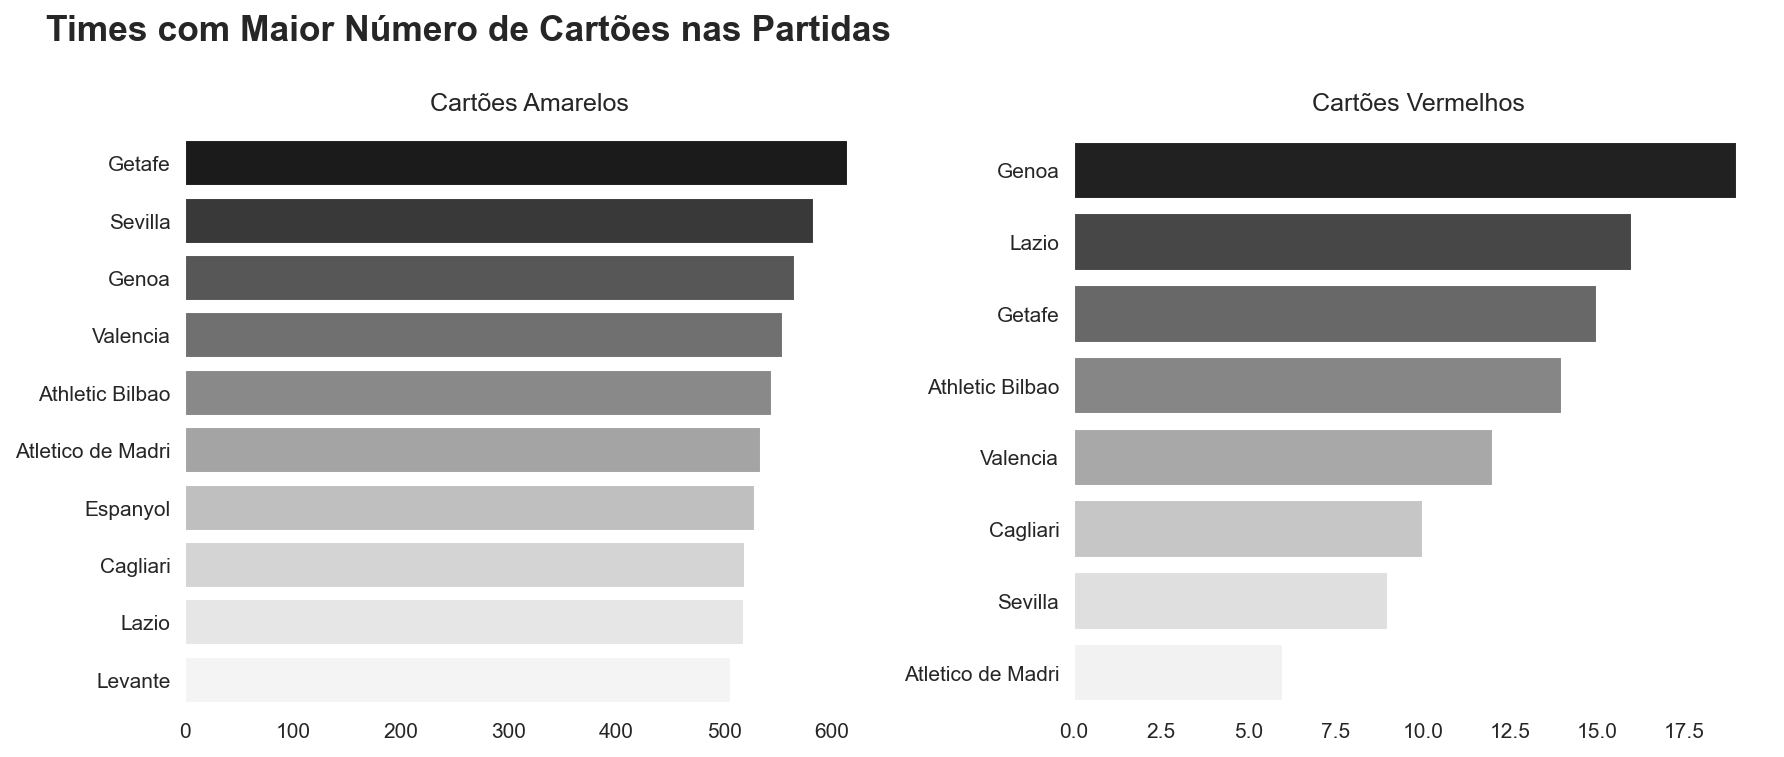

In [109]:
# Criando dataframe auxiliar agrupando os times e somando os seus diferentes tipos de cartões em diferentes colunas
lista_cartoes = ["Cartões amarelos 1", "Cartões vermelhos 1"]
aux = df.groupby("Time 1")[lista_cartoes].sum().reset_index()

fig, axs = plt.subplots(1, 2, dpi=150, figsize=(12, 5))
axs = axs.flatten()

# Criando o gráfico de barplot impedindo duplicatas em número de cartão para deixar mais interessante e aplicando cosméticos para deixar o visual mais "clean"
for idx, nome in enumerate(lista_cartoes):
    aux = aux.drop_duplicates(subset=[nome]).sort_values(by = nome, ascending = False).head(10)
    sns.barplot(data=aux, x=nome, y="Time 1", hue = "Time 1", legend = False, ax=axs[idx], palette="Greys_r")
    
    # Estilização dos plots
    axs[idx].set_title(nome.rstrip("1").title(), y = 1.02)
    axs[idx].set_ylabel('')
    axs[idx].set_xlabel('')
    for spine in axs[idx].spines.values():spine.set_visible(False)

fig.suptitle('Times com Maior Número de Cartões nas Partidas', x = 0.03, ha = "left", fontsize=17, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

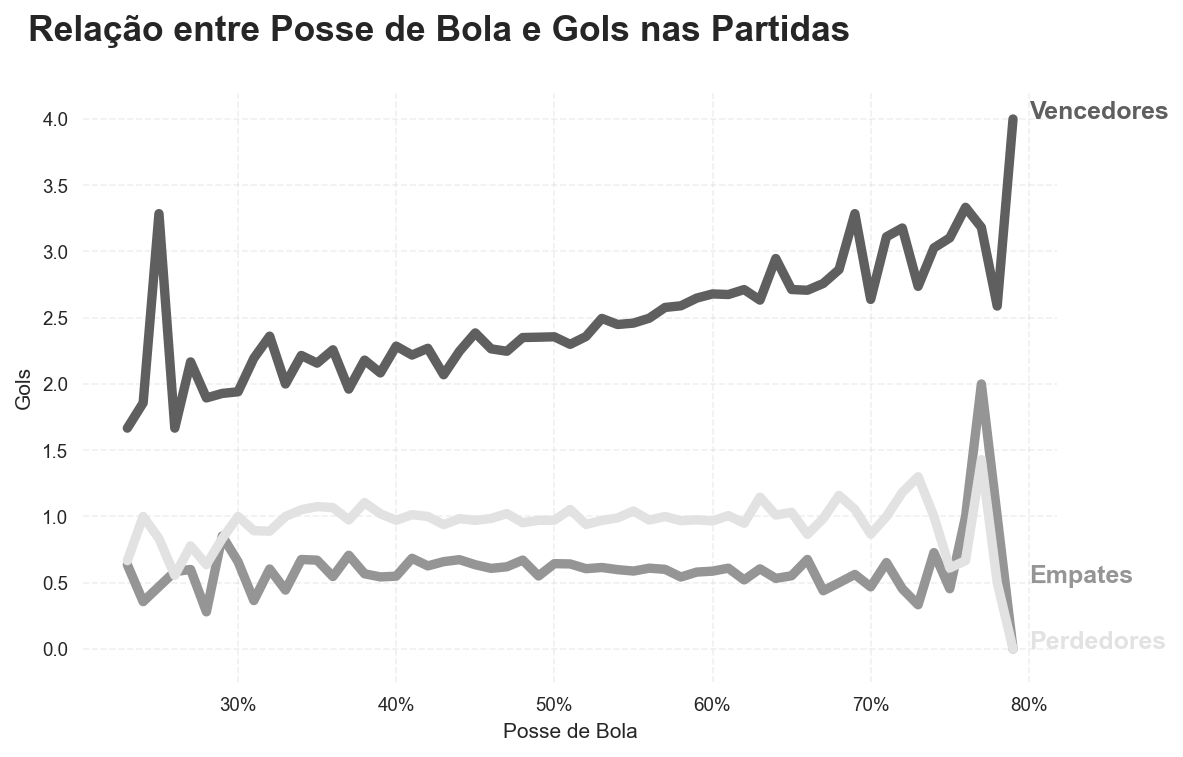

In [110]:
# Dataframe auxiliar que limita o escopo da posse de bola
aux = df[(df["Posse 1(%)"] > 22.0) & (df["Posse 1(%)"] < 80.0)]

# Criação de três lineplots para os times vencedores, perdedores e empates.
fig = plt.figure(figsize = (8,5), dpi = 150)
sns.lineplot(data = aux[aux['Time 1'] == aux["Vencedor"]], x="Posse 1(%)", y="Gols 1", linewidth = 4.5, color=plt.cm.Greys(0.7), errorbar=None)
plt.text(80, 4, "Vencedores", fontsize=12, fontfamily='sans-serif', fontweight='bold', color = plt.get_cmap('Greys')(0.7))
sns.lineplot(data = aux[(aux['Time 2'] == aux["Vencedor"])], x="Posse 1(%)", y="Gols 1", linewidth = 4.5, color=plt.cm.Greys(0.5), errorbar=None)
plt.text(80, 0.5, "Empates", fontsize=12, fontfamily='sans-serif', fontweight='bold', color = plt.get_cmap('Greys')(0.5))
sns.lineplot(data = aux[(aux["Vencedor"] == "Empate")], x="Posse 1(%)", y="Gols 1", linewidth = 4.5, color=plt.cm.Greys(0.2), errorbar=None)
plt.text(80, 0, "Perdedores", fontsize=12, fontfamily='sans-serif', fontweight='bold', color = plt.get_cmap('Greys')(0.2))

# Estilização do gráfico
ax = plt.gca()
for spine in ax.spines.values():spine.set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.set_ylim(-0.25, 4.2)
ax.set_xlabel("Posse de Bola")
ax.set_ylabel("Gols")
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100))
ax.tick_params(axis='both', which='major', labelsize=9)

fig.suptitle('Relação entre Posse de Bola e Gols nas Partidas', x = 0.03, ha = "left", fontsize=17, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

In [111]:
df

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2,Vencedor
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3,Glasgow Rangers
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2,Empate
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2,Empate
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1,Hearts
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1,Aberdeen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,NaN,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1,Blackburn
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,NaN,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2,Arsenal
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,NaN,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2,Manchester Utd
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,...,NaN,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2,Empate


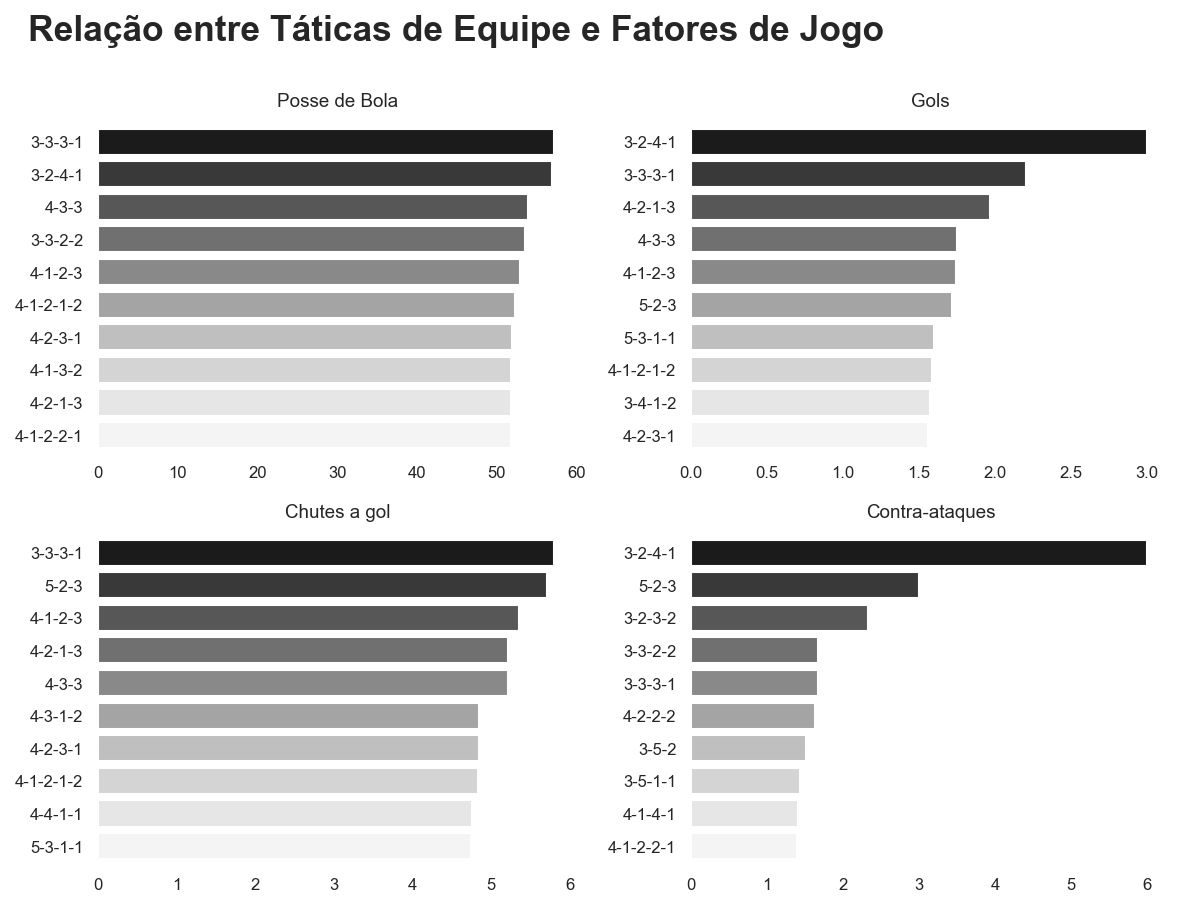

In [112]:
# Lista com as colunas interessantes e titulos à serem usados
lista_elementos = ["Posse 1(%)", "Gols 1", "Chutes a gol 1", "Contra-ataques 1"]
lista_titulos = ["Posse de Bola", "Gols", "Chutes a gol", "Contra-ataques"]
fig, axs = plt.subplots(2, 2, figsize=(8, 6), dpi=150)
axs = axs.flatten()

# Criação dos 4 gráficos de barras
for idx, nome in enumerate(lista_elementos):
    aux = df.groupby("Position 1")[nome].mean().reset_index().sort_values(by=nome, ascending=False)
    sns.barplot(data=aux.head(10), x=nome, y="Position 1", ax=axs[idx], hue = "Position 1", palette = "Greys_r")
    
    # Estilização dos plots
    for spine in axs[idx].spines.values():spine.set_visible(False)
    axs[idx].set_ylabel("")
    axs[idx].set_xlabel("")
    axs[idx].tick_params(axis='both', labelsize=8)
    axs[idx].set_title(lista_titulos[idx], y = 1.02, fontsize = 9)

fig.suptitle('Relação entre Táticas de Equipe e Fatores de Jogo', x = 0.03, ha = "left", fontsize=17, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

In [113]:
df

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2,Vencedor
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3,Glasgow Rangers
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2,Empate
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2,Empate
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1,Hearts
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1,Aberdeen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,NaN,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1,Blackburn
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,NaN,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2,Arsenal
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,NaN,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2,Manchester Utd
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,...,NaN,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2,Empate


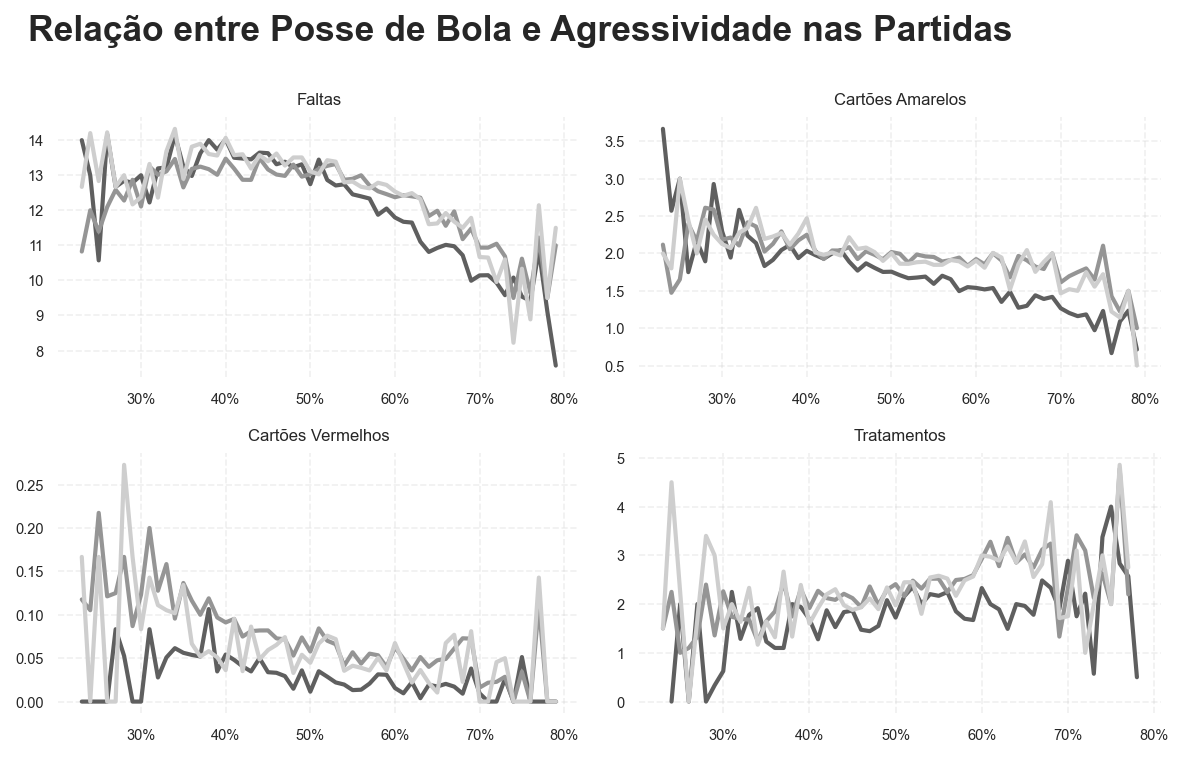

In [114]:
aux = df[(df["Posse 1(%)"] > 22.0) & (df["Posse 1(%)"] < 80.0)]
colunas_interesse = ["Faltas 1", "Cartões amarelos 1", "Cartões vermelhos 1", "Tratamentos 2"]
titulos = ["Faltas", "Cartões Amarelos", "Cartões Vermelhos", "Tratamentos"]

fig, axs = plt.subplots(2, 2, figsize=(8, 5), dpi=150)
axs = axs.flatten()
# Loop para gerar os gráficos
for idx, coluna in enumerate(colunas_interesse):
    sns.lineplot(data=aux[aux["Time 1"] == aux["Vencedor"]], x="Posse 1(%)", y=coluna, linewidth=2, color=plt.cm.Greys(0.7), ax=axs[idx], errorbar=None)
    sns.lineplot(data=aux[aux["Time 1"] != aux["Vencedor"]], x="Posse 1(%)", y=coluna, linewidth=2, color=plt.cm.Greys(0.5), ax=axs[idx], errorbar=None)
    sns.lineplot(data=aux[aux["Vencedor"] == "Empate"], x="Posse 1(%)", y=coluna, linewidth=2, color=plt.cm.Greys(0.3), ax=axs[idx], errorbar=None)

    # Estilização dos plots
    for spine in axs[idx].spines.values(): spine.set_visible(False)
    axs[idx].grid(True, linestyle='--', alpha=0.3)
    axs[idx].set_xlabel("")
    axs[idx].set_ylabel("")
    axs[idx].set_title(titulos[idx], fontsize = 8)
    axs[idx].xaxis.set_major_formatter(PercentFormatter(xmax=100))
    axs[idx].tick_params(axis='both', labelsize=7)
    
fig.suptitle('Relação entre Posse de Bola e Agressividade nas Partidas', x=0.03, ha="left", fontsize=17, fontweight='bold', y=1)
plt.tight_layout()
plt.show()
